On va essayer d'utiliser des techniques d'ensemble pour détecter les colonnes intéressantes :
- arbre de décision

**DPE classification**  
* Target : Etiquette_DPE
* Features :
* Type_bâtiment
* Zone_climatique_
* Type_énergie_principale_chauffage
* Qualité_isolation_enveloppe
* Qualité_isolation_menuiseries
* Qualité_isolation_murs
* Isolation_toiture_(0/1)
* Protection_solaire_exterieure_(0/1)



In [84]:
import pandas as pd
import unicodedata

# chargement des données
file_path = "../data/dpe-v2-logements-existants_Q4-24.csv"
df = pd.read_csv(file_path)

# Comptage des classes par "N°_région_(BAN)"
df['Classe_Hauteur'] = df['Hauteur_sous-plafond'].apply(
    lambda x: '≤2.6' if x <= 2.6 else '>2.6')
df['Classe_Surface'] = df['Surface_habitable_logement'].apply(
    lambda x: '≤50' if x <= 50 else '50-100' if 50 < x <= 100 else '100-150' if 100 < x <= 150 else '150-200' if 150 < x <= 200 else '200-250' if 200 < x <= 250 else '250-300' if 250 < x <= 300 else '300-350' if 300 < x <= 350 else '350-400' if 350 < x <= 400 else '>400' 
)

# un peu d'affichage
for id, value in enumerate(df.columns):
    print(value)
# print(df["Classe_Hauteur"])


print(df["Type_énergie_n°1"].unique())
print(df["Type_énergie_n°2"].unique())
print(df["Type_énergie_n°3"].unique())

C:\Users\Laury\AppData\Local\Temp\ipykernel_21700\2859000675.py:6: DtypeWarning: Columns (11,102,112,190,191,192,193,226,237) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


N°DPE
Date_réception_DPE
Date_établissement_DPE
Date_visite_diagnostiqueur
Modèle_DPE
N°_DPE_remplacé
Date_fin_validité_DPE
Version_DPE
N°_DPE_immeuble_associé
Appartement_non_visité_(0/1)
Méthode_application_DPE
N°_immatriculation_copropriété
Invariant_fiscal_logement
N°_RPLS_logement
Etiquette_GES
Etiquette_DPE
Année_construction
Type_bâtiment
Type_installation_chauffage
Type_installation_ECS_(général)
Période_construction
Hauteur_sous-plafond
Nombre_appartement
Nombre_niveau_immeuble
Nombre_niveau_logement
Surface_habitable_immeuble
Surface_habitable_logement
Surface_tertiaire_immeuble
Classe_inertie_bâtiment
Typologie_logement
Position_logement_dans_immeuble
Classe_altitude
Zone_climatique_
Adresse_brute
Nom__commune_(BAN)
Code_INSEE_(BAN)
N°_voie_(BAN)
Identifiant__BAN
Adresse_(BAN)
Code_postal_(BAN)
Score_BAN
Nom__rue_(BAN)
Coordonnée_cartographique_X_(BAN)
Coordonnée_cartographique_Y_(BAN)
Code_postal_(brut)
N°_étage_appartement
Nom_résidence
Complément_d'adresse_bâtiment
Cage_d

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


colonnes_a_garder = [
    "Type_énergie_n°1",
    "Type_bâtiment",
    "Classe_Surface",
    "Zone_climatique_",
    "Type_énergie_principale_chauffage",
    "Qualité_isolation_enveloppe",
    "Qualité_isolation_menuiseries",
    "Qualité_isolation_murs",
    "Qualité_isolation_plancher_bas",
    "Classe_inertie_bâtiment",
    "Logement_traversant_(0/1)",
    "Présence_brasseur_air_(0/1)",
    "Isolation_toiture_(0/1)",
    "Protection_solaire_exterieure_(0/1)",
    "Inertie_lourde_(0/1)",
    "N°_région_(BAN)",
    "Classe_Hauteur"
]

X = df[colonnes_a_garder]

y = df['Etiquette_DPE']

non_numeric_columns = X.select_dtypes(exclude=['number']).columns
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# Entraîner un modèle
model = RandomForestClassifier()
model.fit(X, y)

# Afficher les importances des features
importances = pd.DataFrame(
    {'Feature': X.columns, 'Importance': model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

C:\Users\Laury\AppData\Local\Temp\ipykernel_21700\1031265326.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col].astype(str))
C:\Users\Laury\AppData\Local\Temp\ipykernel_21700\1031265326.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col].astype(str))
C:\Users\Laury\AppData\Local\Temp\ipykernel_21700\1031265326.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

                                Feature  Importance
14                      N°_région_(BAN)    0.128599
3     Type_énergie_principale_chauffage    0.109009
1                        Classe_Surface    0.099889
2                      Zone_climatique_    0.098242
5         Qualité_isolation_menuiseries    0.087605
7        Qualité_isolation_plancher_bas    0.086919
6                Qualité_isolation_murs    0.084967
4           Qualité_isolation_enveloppe    0.070491
8               Classe_inertie_bâtiment    0.064224
12  Protection_solaire_exterieure_(0/1)    0.049274
9             Logement_traversant_(0/1)    0.035789
15                       Classe_Hauteur    0.029248
11              Isolation_toiture_(0/1)    0.028709
13                 Inertie_lourde_(0/1)    0.014573
10          Présence_brasseur_air_(0/1)    0.012463
0                         Type_bâtiment    0.000000


C:\Users\Laury\AppData\Local\Temp\ipykernel_21700\2712524949.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col].astype(str))
C:\Users\Laury\AppData\Local\Temp\ipykernel_21700\2712524949.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col].astype(str))
C:\Users\Laury\AppData\Local\Temp\ipykernel_21700\2712524949.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

0.5424562099716701
0.517335390946502


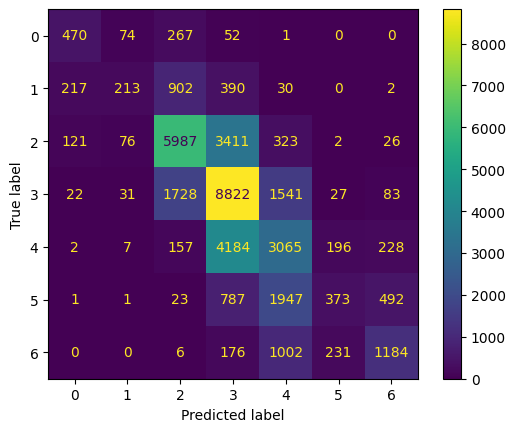

In [78]:
# essayons de voir si le classifieur fonctionne sur ces données
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

colonnes_a_garder = [
    "Classe_Surface",
    "Zone_climatique_",
    "Type_énergie_principale_chauffage",
    "Qualité_isolation_enveloppe",
    "Qualité_isolation_menuiseries",
    "Qualité_isolation_murs",
    "Qualité_isolation_plancher_bas",
    "Classe_inertie_bâtiment",
    "Logement_traversant_(0/1)",
    "Présence_brasseur_air_(0/1)",
    "Isolation_toiture_(0/1)",
    "Protection_solaire_exterieure_(0/1)",
    "Inertie_lourde_(0/1)",
    "N°_région_(BAN)",
    "Classe_Hauteur"
]


X = df[colonnes_a_garder]
y = df['Etiquette_DPE']

non_numeric_columns = X.select_dtypes(exclude=['number']).columns
label_encoder = LabelEncoder()
for col in non_numeric_columns:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=10)
rf_classifier.fit(X_train, y_train)
print(rf_classifier.score(X_train, y_train))
print(rf_classifier.score(X_test, y_test))

# Prédictions sur l'ensemble de test
y_pred = rf_classifier.predict(X_test)

# Générer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm)
disp.plot(cmap="viridis")